# Temperature Response

This notebook introduces the temperature response for each X-Ray Telescope (XRT) X-ray channel, assuming a spectral emission model at a given date. We begin by importing packages. 

In [24]:
import xrtpy

In [25]:
import numpy as np
import matplotlib.pyplot as plt

## Contents

1. [Define Filter](#Define-a-filter)
2. [Define Date & Time](#Define-a-date-and-time) 
3. [Temperature_Response_Fundamental](#Temperature-Response-Fundamental)
4. [Temperature Response Function](#Temperature-Response-function)
5. [Plot Temperature Response](#Plotting-the-Temperature-Response)


## Define a filter

Begin by defining a filter channel by its abbreviation. For example, if we want to explore Carbon 'C' Polyimide 'poly'. The abbreviation would be 'C-poly'.  The process is the same for all xrt filters. 

In [26]:
Filter = "C-poly"

## Define a date and time

[sunpy-time]:https://docs.sunpy.org/en/stable/guide/time.html

The date and time can be defined in many different formats. More date and time format examples can be found at [sunpy-time]. We follow a standard format to define the date and time of interest. We are going to explore data a year after the launch date.

In [27]:
date_time ="2007-09-22T22:00:00"

## Temperature-Response-Fundamental

The `TemperatureResponseFundamental` object is where we will find all functions and properties used to calculate the temperature response function. The `TemperatureResponseFundamental` object is referenced by inserting the defined `Filter` and `date_time`. 

In [28]:
Temperature_Response_Fundamental = xrtpy.response.TemperatureResponseFundamental(Filter,date_time )

## Temperature Response function

The temperature response function is exercised by referencing the `temperature_response()` function in `Temperature_Response_Fundamental`. 

In [29]:
temperature_response = Temperature_Response_Fundamental.temperature_response()

[astropy-quantity]: https://docs.astropy.org/en/stable/api/astropy.units.quantity.Quantity.html

[astropy.units]: https://docs.astropy.org/en/stable/units/index.html


The `temperature_response` function returns the temperature response for a selected filter and date and time as an [astropy-quantity] with [astropy.units].  
  

In [30]:
print('Temperature Response:\n',temperature_response )

Temperature Response:
 [1.74828020e-32 2.97537464e-32 5.52862991e-32 1.12118094e-31
 2.39356810e-31 5.21526368e-31 1.14337927e-30 2.49272255e-30
 5.35113297e-30 1.12072610e-29 2.23399125e-29 4.23540428e-29
 7.82927391e-29 1.42477496e-28 2.54383778e-28 4.45117930e-28
 7.66051639e-28 1.30749792e-27 2.21403786e-27 3.64843391e-27
 5.65636064e-27 8.05906288e-27 1.05938940e-26 1.29745781e-26
 1.48647062e-26 1.63803178e-26 1.88756468e-26 2.42891320e-26
 3.34045498e-26 4.60144836e-26 6.19980411e-26 8.13021890e-26
 1.03625173e-25 1.28260701e-25 1.54185053e-25 1.80275366e-25
 2.05188906e-25 2.27056152e-25 2.43217495e-25 2.50429476e-25
 2.45325200e-25 2.25675085e-25 1.92484095e-25 1.53486331e-25
 1.18734750e-25 9.27387197e-26 7.47329322e-26 6.24597324e-26
 5.40049480e-26 4.79948354e-26 4.35404716e-26 4.00897087e-26
 3.72945061e-26 3.49495337e-26 3.29156385e-26 3.11257886e-26
 2.95333129e-26 2.81180896e-26 2.68692947e-26 2.57758796e-26
 2.48206914e-26] cm5 DN / (pix s)


## Plotting the Temperature-Response

[chiantidatrbase.org]: https://www.chiantidatabase.org/

We are going to plot the `temperature_response` function versus the temperatures . The XRT chianti version is based on abundance assumptions. More information about the chianti database can be found at [chiantidatrbase.org].

The CHIANTI temperatures exist in the `Temperature_Response_Fundamental` object in units of Kelvin (K). These temperatures are independent of the chosen channel filter.

In [31]:
CHIANTI_temperature = Temperature_Response_Fundamental.CHIANTI_temperature

[numpy.log10]: https://numpy.org/doc/stable/reference/generated/numpy.log10.html

The `CHIANTI_temperature` values are logged for scaling.

In [19]:
log_CHIANTI_temperature= np.log10(CHIANTI_temperature.value)

In addition, we are going to plot the temperature response near the launch date to analysis any difference in the data.  We define the temperature response data for the launch date in the same manner as previously shown. 

In [22]:
launch_date_time = "2006-09-22T22:00:00"
TRF = xrtpy.response.TemperatureResponseFundamental(Filter,launch_date_time)
launch_date_temperature_response = TRF.temperature_response()

Create a plotting function that plots the `temperature_response` and `launch_date_temperature_response` versus `log_CHIANTI_temperature` for the chosen filter and date. 

In [32]:
def plotting_temperature_response():
    
    plt.figure(figsize=(30, 12))
    
    plt.plot(log_CHIANTI_temperature, np.log10(launch_date_temperature_response.value),label='{:} {:}'.format(Filter,launch_date_time),color='red')
    plt.plot(log_CHIANTI_temperature, np.log10(temperature_response.value),label='{:} {:}'.format(Filter,date_time))
    
    plt.title('XRT Temperature Response',fontsize = 30)
    plt.xlabel('Temperature ($K$)',fontsize = 27)
    plt.ylabel('$DN$ $cm^5$ $ s^-1$ $pix^-1$',fontsize=27)
    plt.legend(fontsize=30)

    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)

    plt.grid()
    plt.show()  


Run `plotting_temperature_response` function to create the plot.

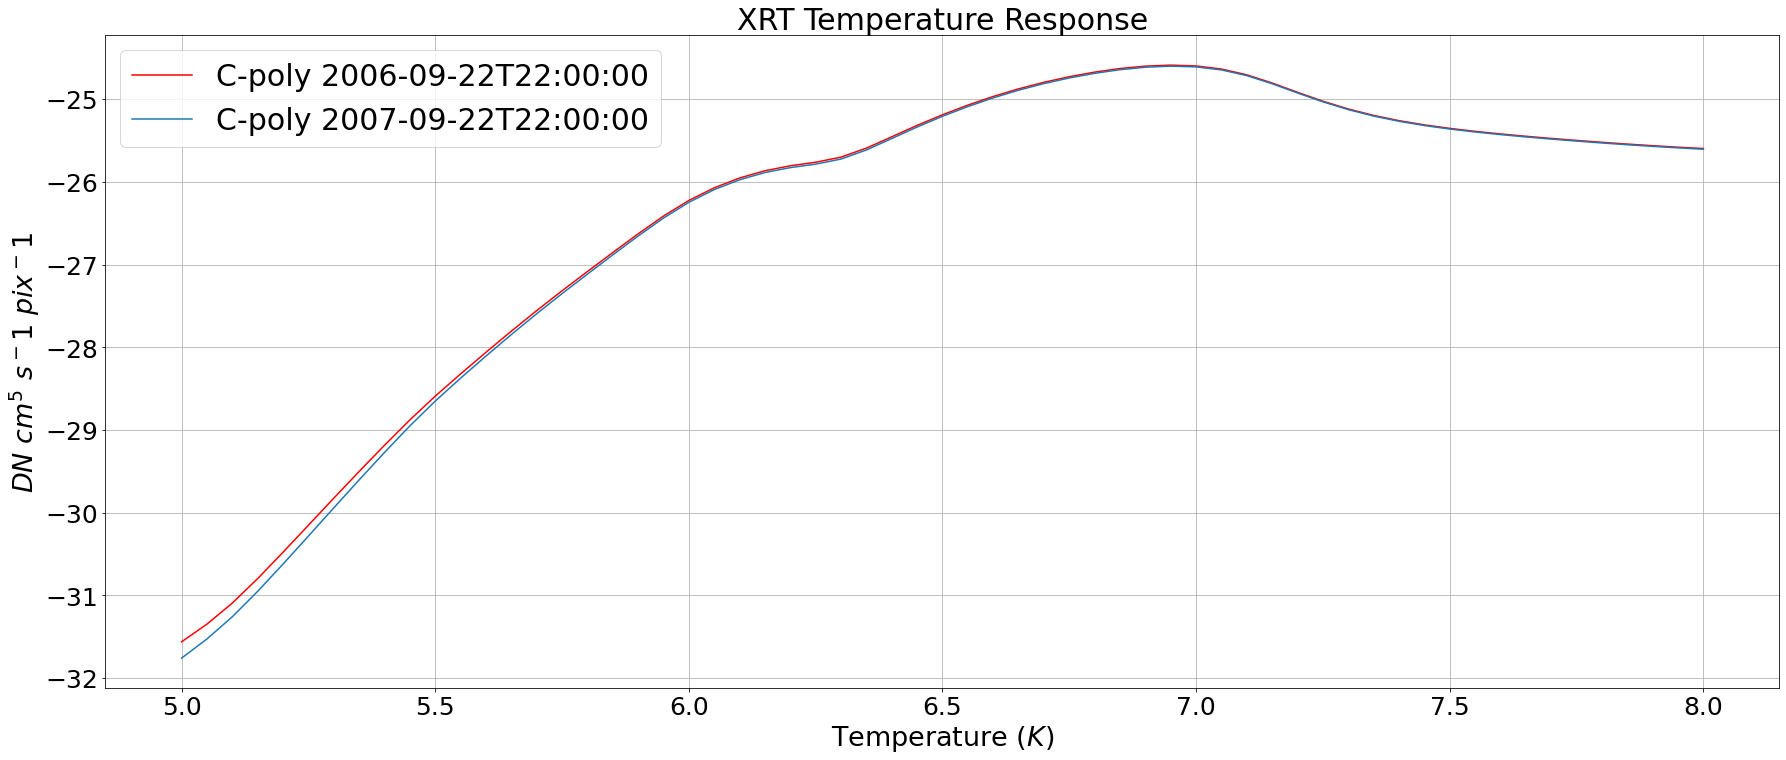

In [33]:
plotting_temperature_response()

[Montana State University Solar Physics site]:http://solar.physics.montana.edu/HINODE/XRT/xrt_contam_db.html
[Narukage et. al. (2011)]:https:doi.org/10.1007/s11207-010-9685-2

Plotting the temperature response at launch date and a year after highlights a small differences. This is due to the contamination layer thickness on the CCD. Information about the XRT CCD contaminant layer thickness calculation can be found at [Montana State University Solar Physics site]. In addition, more information can be found referencing [Narukage et. al. (2011)]
